In this file Kochi-shi data is taken from Pegasus32 and the `aos` area is clipped to save all files for the simulation case

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('default')

In [16]:
case = 'kochi'
# case = 'arahama'

if case == 'kochi':
    census = gpd.read_file('/Volumes/Pegasus32/kochi/census/kochi-shi-census.shp').to_crs(4326)
    shelters = gpd.read_file('/Volumes/Pegasus32/kochi/evacuation/Kochi_EvacBldg_CRS4326.geojson',driver='GeoJSON')
    mesh = gpd.read_file('/Volumes/Pegasus32/kochi/mesh/GEOJSON/kochi-shi-mesh.geojson',driver='GeoJSON')
    shi_pol = gpd.read_file('/Volumes/Pegasus32/kochi/polygon/WGS84/GEOJSON/kochi-shi-wgs84.geojson',driver='GeoJSON')
    shi_town = gpd.read_file('/Volumes/Pegasus32/kochi/town/shi/kochi-shi_town.shp')
    edges = gpd.read_file('/Volumes/Pegasus32/kochi/road/pref/kochi_edges_crs6690.geojson',driver='GeoJSON').to_crs(4326)
    nodes = gpd.read_file('/Volumes/Pegasus32/kochi/road/pref/kochi_nodes_crs6690.geojson',driver='GeoJSON').to_crs(4326)
    
if case == 'arahama':
    census = gpd.read_file('/Volumes/Pegasus32/arahama/census/arahama_census.geojson',driver='GeoJSON').to_crs(4326)
    census.rename(columns={'8':'M_TOTPOP_H'},inplace=True)
    # shelters = gpd.read_file('/Volumes/Pegasus32/arahama/evacuation/????',driver='GeoJSON')
    mesh = gpd.read_file('/Volumes/Pegasus32/arahama/mesh/arahama_mesh4.geojson',driver='GeoJSON')
    # shi_pol = gpd.read_file('/Volumes/Pegasus32/kochi/polygon/WGS84/GEOJSON/kochi-shi-wgs84.geojson',driver='GeoJSON')
    # shi_town = gpd.read_file('/Volumes/Pegasus32/arahama/town/????')
    edges = gpd.read_file('/Volumes/Pegasus32/arahama/road/arahama_network.gpkg',driver='GPKG',layer=0).to_crs(4326)
    nodes = gpd.read_file('/Volumes/Pegasus32/arahama/road/arahama_network.gpkg',driver='GPKG',layer=1).to_crs(4326)    

<AxesSubplot:>

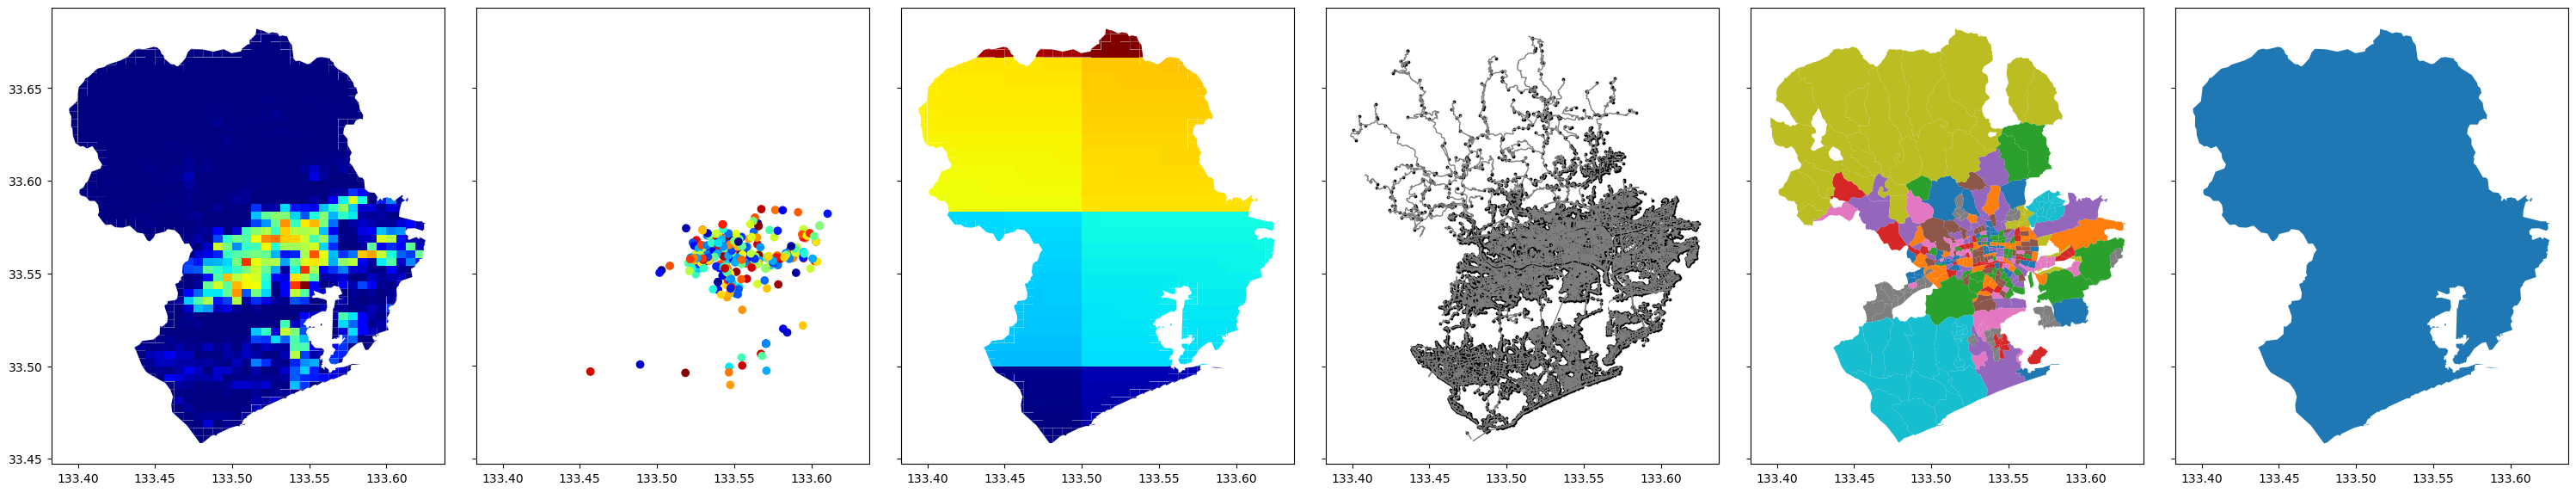

In [17]:
fig,axs = plt.subplots(1,6,sharex=True,sharey=True,figsize=(30,10))
plt.tight_layout()
census.plot(ax=axs[0],column='M_TOTPOP_H',cmap='jet')
shelters.plot(ax=axs[1],column='capacity_per',cmap='jet')
mesh.plot(ax=axs[2],column='MESH4_ID',cmap='jet')
edges.plot(ax=axs[3],color='grey',lw=1)
nodes.plot(ax=axs[3],markersize=3,color='k')
shi_town.plot(ax=axs[4],column='Val_GovCod')
shi_pol.plot(ax=axs[5])


In [18]:
aos = gpd.read_file(f'./case/{case}/aos.geojson',driver='GeoJSON')

In [19]:
c = census.clip(aos)
sh = shelters.clip(aos)
m = mesh.clip(aos)
e = edges.clip(aos)
n = nodes.clip(aos)
t = shi_town.clip(aos)

In [23]:
n.describe()

/Users/erick/opt/anaconda3/envs/tsuevac_env/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,ndno,ndatcd,nbmesh,nbndno,fgknd,signal,crkjcnt,crkjnm,crkncnt,crknnm,...,ctnd5,ctcrs5,ctnd6,ctcrs6,ctnd7,ctcrs7,ctnd8,ctcrs8,mcode,geometry
count,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,...,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350
unique,5340,5,3,75,2,2,7,24,11,24,...,23,3,2,1,1,1,1,1,2,5313
top,00100,1,000000,00000,0,2,00,,00,,...,00000,00000000,00000,00000000,00000,00000000,00000,00000000,503324,POINT (133.49740850500007 33.56811005900005)
freq,2,3781,5276,5276,4323,4889,5289,5289,5289,5289,...,5328,5348,5349,5350,5350,5350,5350,5350,5295,2


<AxesSubplot:>

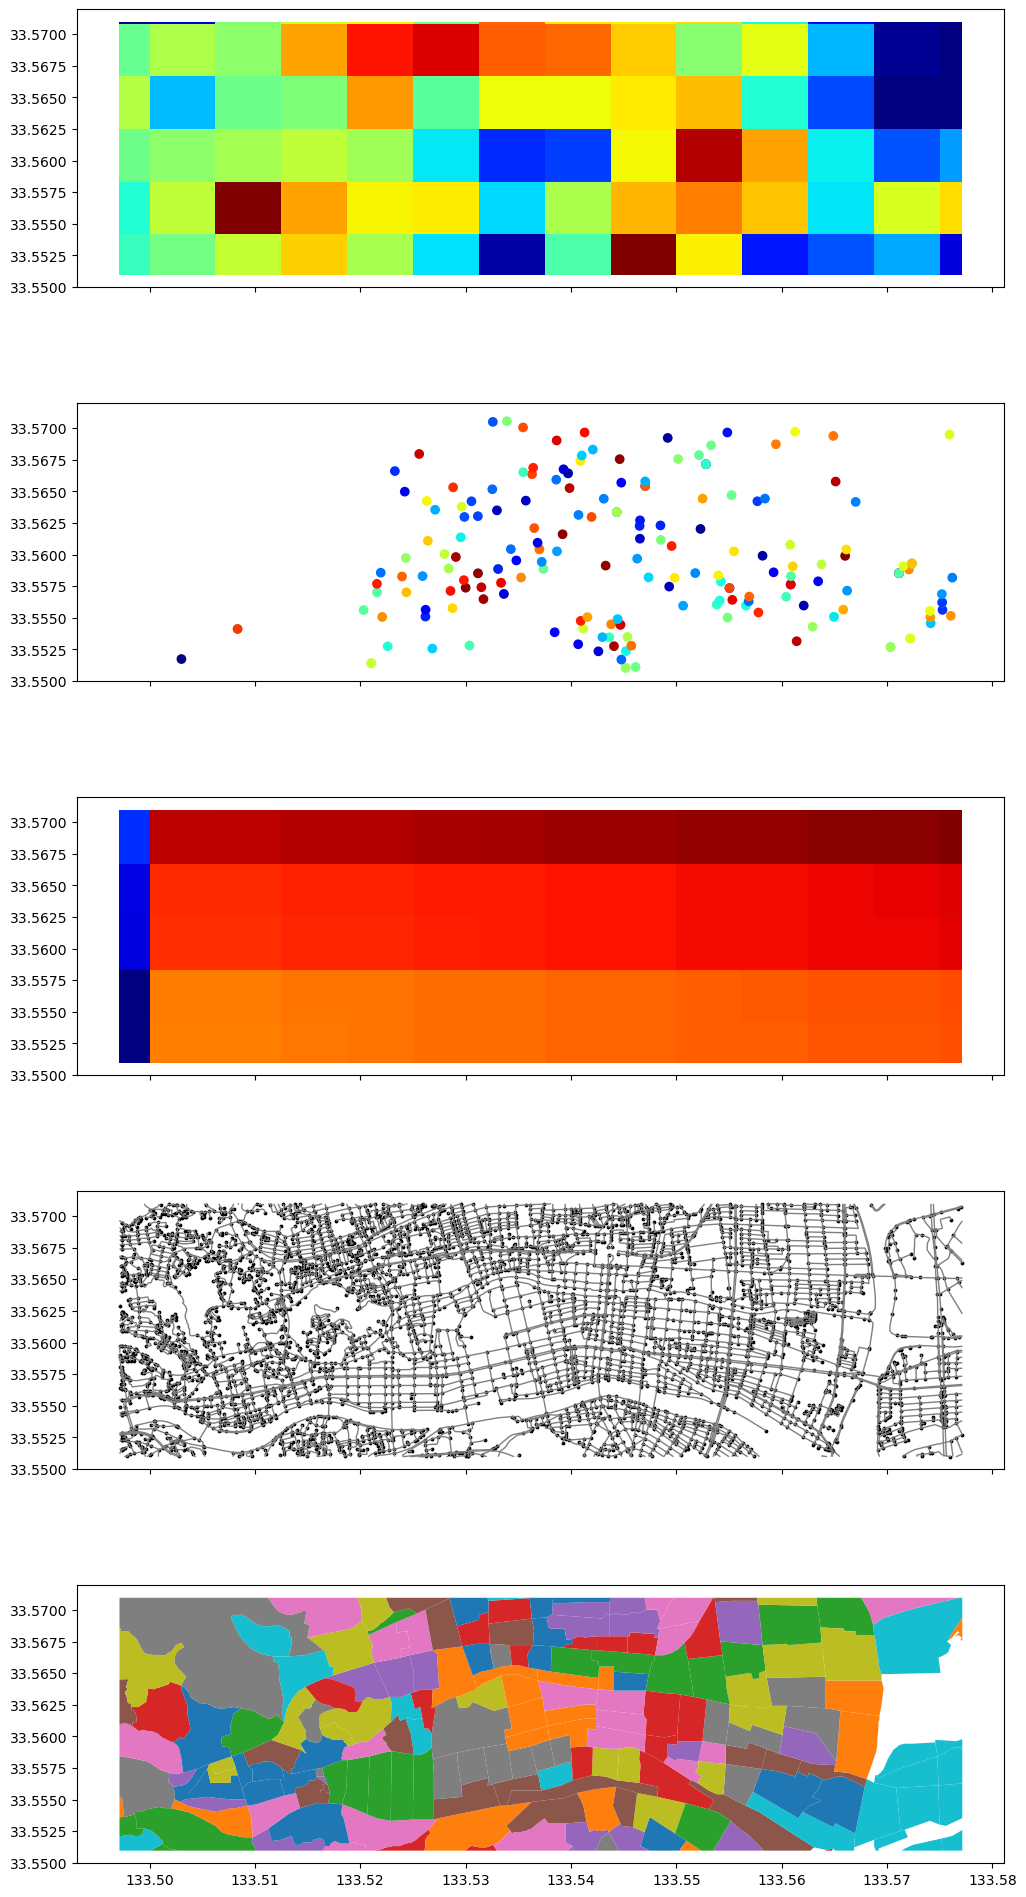

In [20]:
fig,axs = plt.subplots(5,1,sharex=True,sharey=True,figsize=(10,20))
plt.tight_layout()
c.plot(ax=axs[0],column='M_TOTPOP_H',cmap='jet')
sh.plot(ax=axs[1],column='capacity_per',cmap='jet')
m.plot(ax=axs[2],column='MESH4_ID',cmap='jet')
e.plot(ax=axs[3],color='grey',lw=1)
n.plot(ax=axs[3],markersize=3,column)
t.plot(ax=axs[4],column='Val_GovCod')

In [21]:
c.to_file(f'./case/{case}/aos_census.geojson',driver='GeoJSON')
sh.to_file(f'./case/{case}/aos_shelters.geojson',driver='GeoJSON')
m.to_file(f'./case/{case}/aos_mesh.geojson',driver='GeoJSON')
e.to_file(f'./case/{case}/aos_edges_esri.geojson',driver='GeoJSON')
n.to_file(f'./case/{case}/aos_nodes_esri.geojson',driver='GeoJSON')
t.to_file(f'./case/{case}/aos_town.geojson',driver='GeoJSON')